# DA4: Reshaping data    
_First let's load the requisite packages and some data (surveys)._

In [15]:
# A Python data analysis and manipulation tool
import pandas as pd

# Python equivalent of `ggplot2`
from plotnine import *

# If using seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt

surveys_join = pd.read_csv("data/surveys_join.csv")

_Now we use the __.pivot()__ method to pivot wider_

In [16]:
surveys_wide = surveys_join.pivot(
    index = "record_id",
    columns = "year",
    values = "weight"
)


surveys_wide.head()

year,2021,2022,2023,2024
record_id,,,,
118,199.5,192.8,192.6,187.6
160,192.5,189.0,184.3,181.4
166,195.4,189.5,183.6,182.0
178,190.1,188.4,182.2,177.5
184,195.1,186.7,193.5,187.3


_Let's tidy up those headers with a yr\_ prefix (unfortunately this will break record_id so there's an extra step to fix it)._

In [17]:
# Add 'yr_' prefix to year columns
surveys_wide.columns = [f"yr_{col}" for col in surveys_wide.columns]

# Reset index to make 'record_id' a column again
surveys_wide = surveys_wide.reset_index()

surveys_wide.head()

,record_id,yr_2021,yr_2022,yr_2023,yr_2024
0,118,199.5,192.8,192.6,187.6
1,160,192.5,189.0,184.3,181.4
2,166,195.4,189.5,183.6,182.0
3,178,190.1,188.4,182.2,177.5
4,184,195.1,186.7,193.5,187.3


__Example usage: Explore any possible relationship between 2021 and 2022 using plotnine aka why did we do all of this processing?__

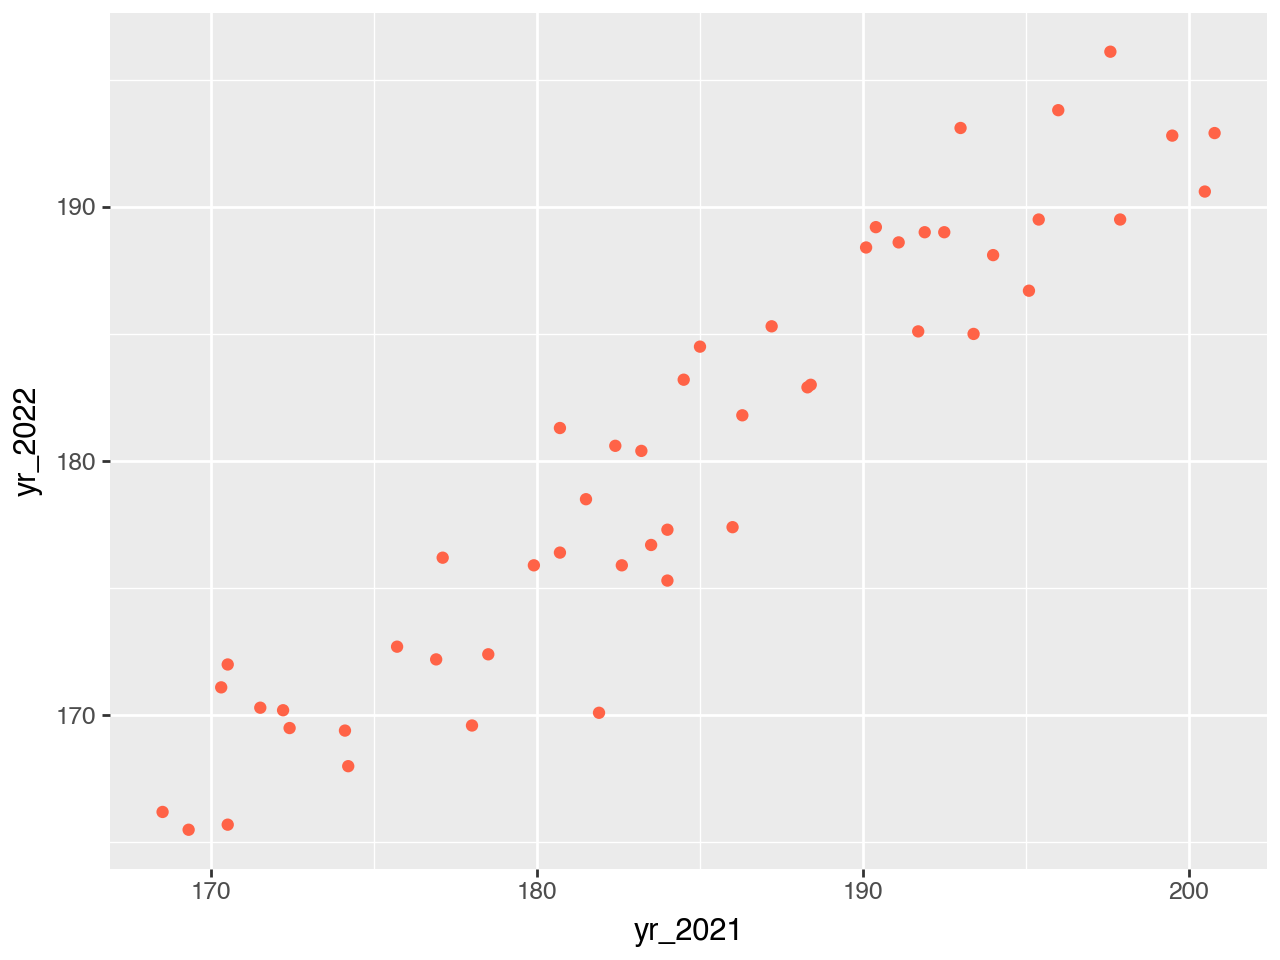

In [18]:
# Colour the points tomato red - because why not? Demonstrates setting parameters in levels.

p = (ggplot(surveys_wide, aes(x = "yr_2021", y = "yr_2022")) +
    geom_point(colour="tomato"))
    
p.show()

*For reasons unknown, the opposite to __.pivot()__ is __.melt()__. In the interests of moving forward, let's just use it.*

In [19]:
surveys_long = surveys_wide.melt(
    id_vars = "record_id",            # columns to keep fixed
    var_name = "year",                # name of the new 'year' column
    value_name = "weight"             # name of the new 'weight' column
)

surveys_long.head()

,record_id,year,weight
0,118,yr_2021,199.5
1,160,yr_2021,192.5
2,166,yr_2021,195.4
3,178,yr_2021,190.1
4,184,yr_2021,195.1


_Let's fix those year column values back to numbers by substituting the string and then casting to integer._

In [20]:
surveys_long["year"] = surveys_long["year"].str.replace("yr_", "").astype(int)

surveys_long.head()

,record_id,year,weight
0,118,2021,199.5
1,160,2021,192.5
2,166,2021,195.4
3,178,2021,190.1
4,184,2021,195.1


__Much better !__

# DA4: Combining data
__Different types of joins__

![Alt Inner join animation](https://raw.githubusercontent.com/gadenbuie/tidyexplain/main/images/inner-join.gif "inner join")



![Alt Left join animation](https://raw.githubusercontent.com/gadenbuie/tidyexplain/main/images/left-join.gif "Left join")

    

![Alt Right join animation](https://raw.githubusercontent.com/gadenbuie/tidyexplain/main/images/right-join.gif "Right join")

    

![Alt Full join animation](https://raw.githubusercontent.com/gadenbuie/tidyexplain/main/images/full-join.gif "Full join")

    

## Let's do a simple Left join to illustrate how to do this in Python
Then when you work through the chapter you can try other joins.

In [6]:
# A Python data analysis and manipulation tool
import pandas as pd

# Python equivalent of `ggplot2`
from plotnine import *

surveys = pd.read_csv("data/surveys.csv")

# Read in a file that can be used to translate plotIDs into plot-types
plot_types = pd.read_csv("data/plots.csv")

plot_types # list the plot types

,plot_id,plot_type
0,1,Spectab exclosure
1,2,Control
2,3,Long-term Krat Exclosure
3,4,Rodent Exclosure
4,5,Short-term Krat Exclosure


We use the __.merge()__ method with data coming from __surveys__ and __plot_types__, 
the how being a __left-join__ and the join being on the common field of __plot_id__. 

In [8]:
surveys_left = pd.merge(surveys, plot_types, how = "left", on = "plot_id")

surveys_left

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,plot_type
0,1,7,16,1977,2,NL,M,32.0,NaN,Control
1,2,7,16,1977,3,NL,M,33.0,NaN,Long-term Krat Exclosure
2,3,7,16,1977,2,DM,F,37.0,NaN,Control
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,Long-term Krat Exclosure
...,...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0,NaN
35547,35548,12,31,2002,7,DO,M,36.0,51.0,NaN


# Let's use our newly derived data structure to create a box-plot of plot_type vs. hindfoot_length that names the type of enclosure rather than using an id number.

/Users/fernan02/miniforge3/lib/python3.12/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 4111 rows containing non-finite values.


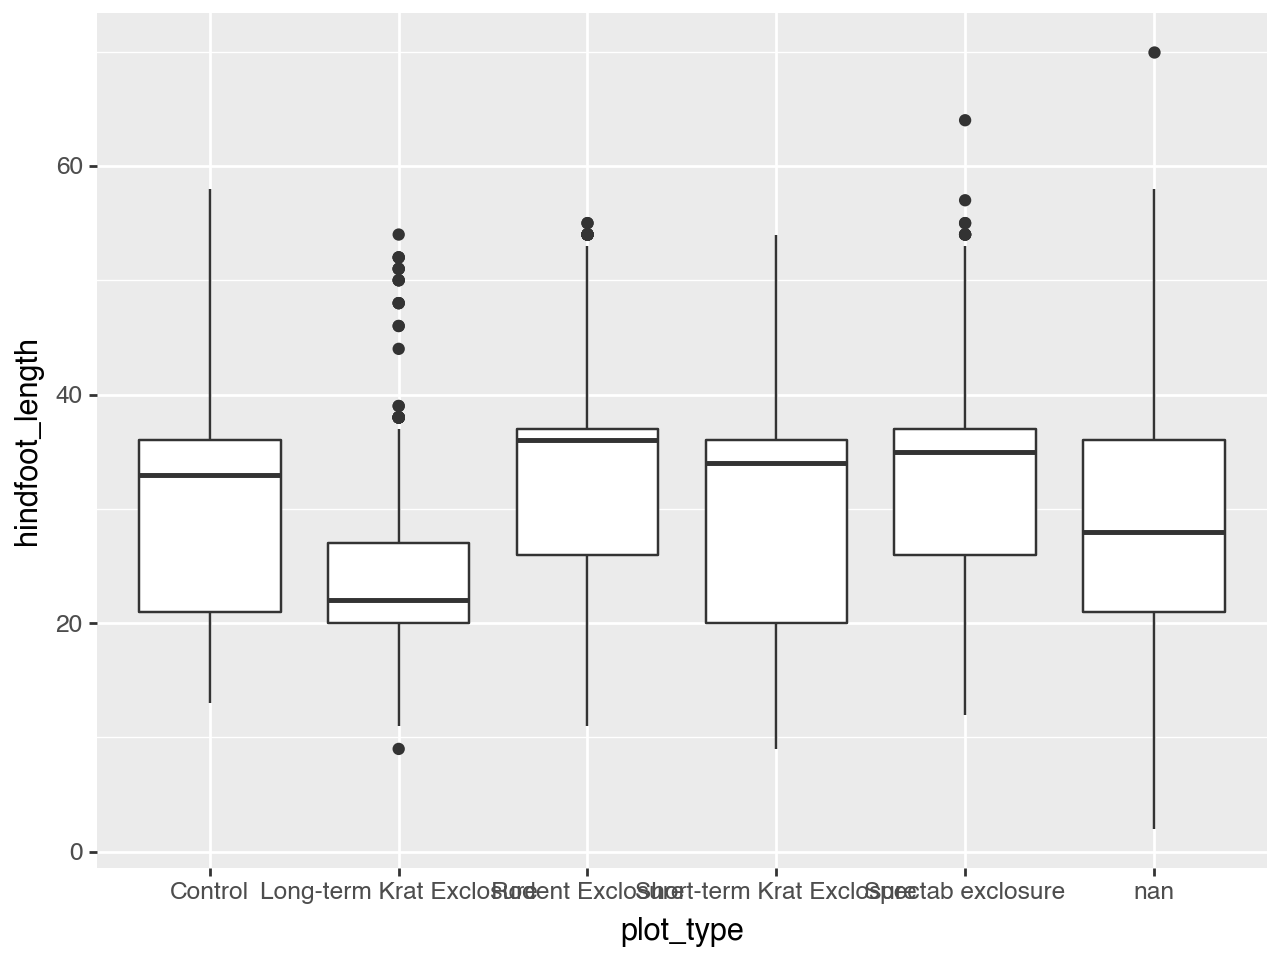

In [9]:
p = (ggplot(surveys_left, aes(x = "plot_type", y = "hindfoot_length")) +
  geom_boxplot())
  
p.show()

# Now work through the material of chapter 13 and try the exercises at the end.